<a href="https://colab.research.google.com/github/jdexbarr/Neural-networks/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Load MNIST and preprocess it
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten images for processing the data for the neural network in an 28x28 -> 784
x_train = x_train.reshape((-1, 28 * 28))
x_test  = x_test.reshape((-1, 28 * 28))

print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 784)
Test shape: (10000, 784)


In [ ]:
# autoencoder Model, building of the encoder and decoder

input_dim = 784        #flat the image, we get this result by 28*28
latent_dim = 32        # representation size when is compressed

# Encoder
input_img = keras.Input(shape=(input_dim,))   # The model input is defined as a vector of dimension
encoded = layers.Dense(128, activation="relu")(input_img)  #First hidden layer of the encoder
encoded = layers.Dense(latent_dim, activation="relu")(encoded)  #Second layer of the encoder, this vector is a compressed representation of the input

# Decoder
decoded = layers.Dense(128, activation="relu")(encoded)  #begins to reconstruct the information
decoded = layers.Dense(input_dim, activation="sigmoid")(decoded) #Final layer of the decoder that reconstructs the original input

#  autoencoder model
autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(
    optimizer="adam",
    loss="binary_crossentropy"
)

autoencoder.summary()




Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209,968 (820.19 KB)

 Trainable params: 209,968 (820.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#TRAINING

history = autoencoder.fit(
    x_train, x_train,      # input = target thats is the reconstruction
    epochs=10,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 0.3375 - val_loss: 0.1591
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1492 - val_loss: 0.1260
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1226 - val_loss: 0.1142
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.1125 - val_loss: 0.1079
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1063 - val_loss: 0.1038
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1029 - val_loss: 0.1011
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1003 - val_loss: 0.0993
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0985 - val_loss: 0.0979
Epoch 9/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0971 - val_loss: 0.0966
Epoch 10/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0960 - val_loss: 0.0956


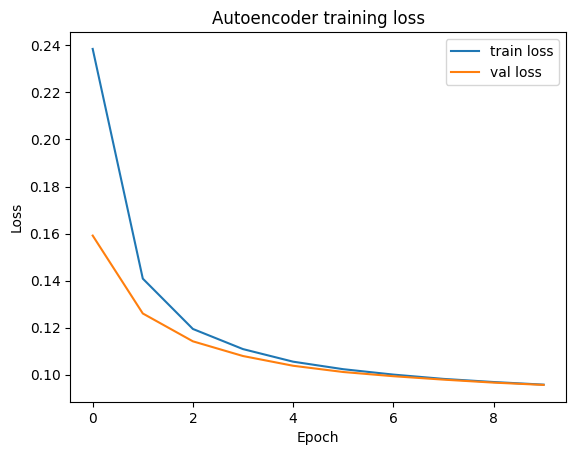

In [ ]:

# Graph of the plot training and the loss
plt.figure()
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Autoencoder training loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


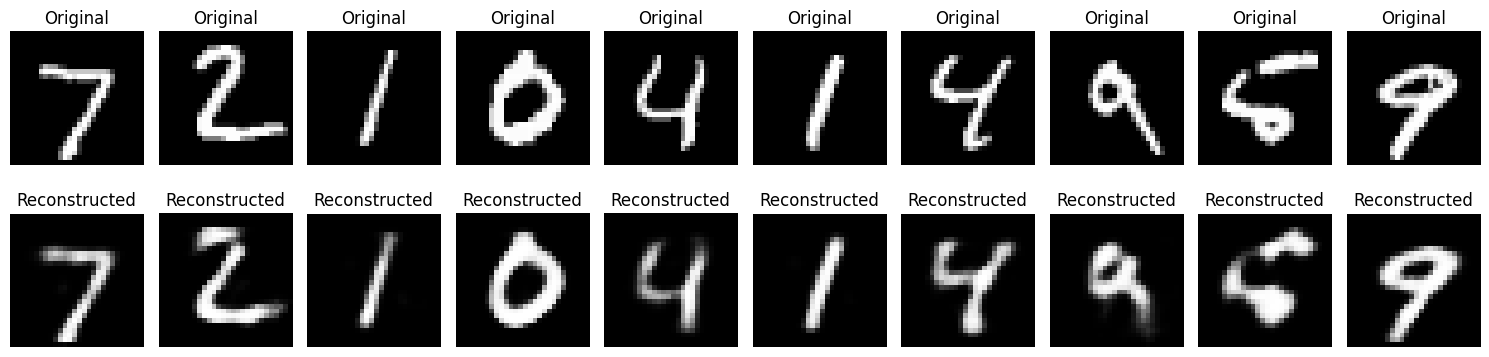

In [ ]:
#  Reconstruct test images

decoded_imgs = autoencoder.predict(x_test[:10])

# Reshape back to the original 28x28 for the visualization
x_test_imgs = x_test[:10].reshape((-1, 28, 28))
decoded_imgs = decoded_imgs.reshape((-1, 28, 28))

# original vs reconstructed
n = 10                                            # number of digits that are gonna be displayed
plt.figure(figsize=(15, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_imgs[i], cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.show()